In [2]:
# Importamos los paquetes que vamos a utilizar

import pandas as pd
import pandas.plotting as pdplt
import numpy as np
import astropy as ast
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcdefaults()

df_mass = pd.read_csv("catalogs/EGS_stellar_mass_noon.csv")
df_mass = df_mass[df_mass > -90]

df_phys = pd.read_csv("catalogs/EGS_physical_properties_noon.csv")
df_phys = df_phys[df_phys > -90]

df_reds = pd.read_csv("catalogs/EGS_redshift_noon.csv")

df_mult = pd.read_csv("catalogs/EGS_multiband_noon.csv")
#df_mult = df_mult[df_mult > -90]

Ajuste lineal:
 - Pendiente = 0.49713
 - Origen = -2.49112


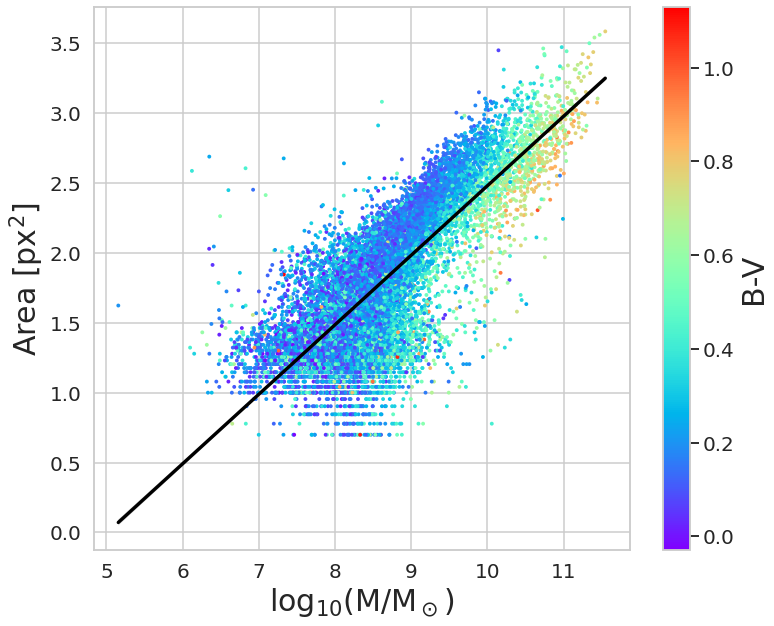

In [3]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')
sns.set_context('talk')

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = pd.DataFrame(df_mass["M_neb_med"])
x.columns = ['log(M)']
y = np.log10(df_mult[['ISOAREAF_IMAGE']])
y.columns = ['log(isoarea)']
z = pd.DataFrame(df_phys['BMag_6a_tau^NEB'] - df_phys['VMag_6a_tau^NEB'])
z.columns = ['B-V']

ax = sns.scatterplot(x = x['log(M)'], y = y['log(isoarea)'], s = 15, edgecolor = 'none', data = z, hue = 'B-V', palette = 'rainbow')
sns.regplot(x = x['log(M)'], y = y['log(isoarea)'], scatter=False, ax=ax, color = 'k')

plt.legend([], [], frameon=False)
norm = plt.Normalize(z['B-V'].min(), z['B-V'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])
cb = ax.figure.colorbar(sm, label = 'B-V')
cb.set_label(label='B-V', fontsize = 30)


df_test2 = pd.concat([x, y], axis = 1)
df_test2 = df_test2.dropna()
x2 = np.array(df_test2['log(M)'])#.reshape((-1, 1))
y2 = np.array(df_test2['log(isoarea)'])

m, b = np.polyfit(x2, y2, 1)

print('Ajuste lineal:')
print(' - Pendiente =', '{:.5f}'.format(m))
print(' - Origen =', '{:.5f}'.format(b))

plt.xlabel('$\mathregular{log_{10}(M/M_\odot)}$', size = 30)
plt.ylabel('$\mathregular{Area}$ $\mathregular{[px^2]}$', size = 30)

del x, y, z
matplotlib.rcdefaults()

In [4]:
area = pd.DataFrame(df_mult['ISOAREAF_IMAGE'])
area_scale = 0.135 * 0.121

area *= area_scale
area

radius = np.sqrt(area/np.pi)
radius.columns = ['radius (arcsec)']
radius

z = pd.DataFrame(df_reds['z_best'])

radius2 = radius['radius (arcsec)']*(1+z['z_best'])
radius2


0        0.996727
1        1.227826
2        0.792051
3        1.098513
4        2.118063
           ...   
15145    0.826621
15146    1.150103
15147    0.887796
15148    1.088990
15149    0.785400
Length: 15150, dtype: float64

In [5]:
from astropy.cosmology import Planck15
from astropy import units as u
z     = 2                                 # redshift of galaxies
theta = 1 * u.arcsec                   # angle
r_ang = Planck15.kpc_proper_per_arcmin(z) # phys. dist. per angle
r     = r_ang * theta                     # physical distance
print('radius: ', r.to(u.kpc))

radius:  8.583688519263623 kpc


In [6]:
from astropy.table import Table

z_1 = pd.DataFrame(df_reds['z_best'])
z_1 = Table.from_pandas(z_1)

radius_arcsec = np.array(radius)*u.arcsec

z_1 = df_reds['z_best']

radio = []

i = 0

#kpc_arcmin = np.vectorize(Planck15.kpc_proper_per_arcmin)
while i <= len(z_1)-1:
    r_ang = Planck15.kpc_proper_per_arcmin(z_1[i])/60

    r = r_ang * radius_arcsec[i][0]
    
    radio.append(r.to_value())
    i += 1
    
radio = pd.DataFrame(radio)
radio.columns = ['radius']
radio

,radius
0,2.911415
1,4.158212
2,2.659797
3,3.295105
4,6.583400
...,...
15145,2.656974
15146,3.405651
15147,2.464320
15148,3.655545


---

Ajuste lineal:
 - Pendiente = 0.24754
 - Origen = -1.44415


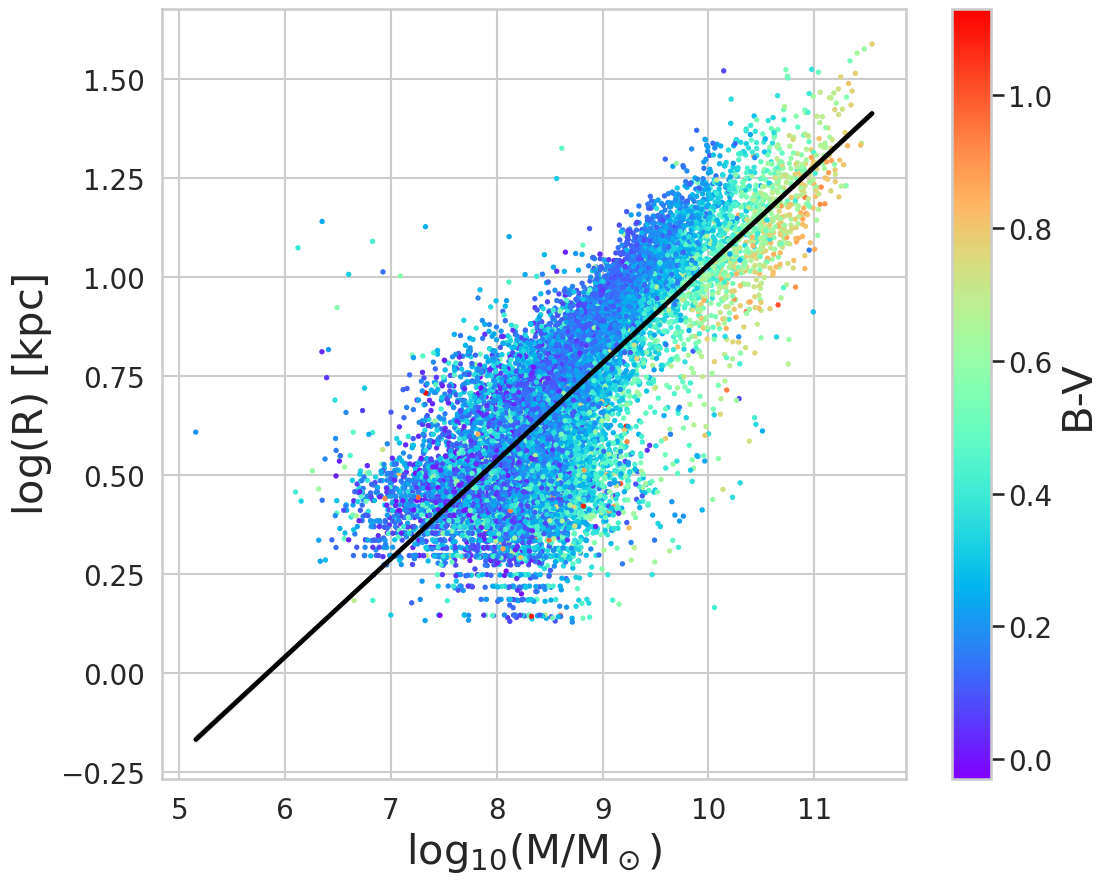

In [7]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')
sns.set_context('talk')

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = pd.DataFrame(df_mass["M_neb_med"])
x.columns = ['log(M)']
y = np.log10(pd.DataFrame(radio))
y.columns = ['radius']
z = pd.DataFrame(df_phys['BMag_6a_tau^NEB'] - df_phys['VMag_6a_tau^NEB'])
z.columns = ['B-V']

ax = sns.scatterplot(x = x['log(M)'], y = y['radius'], s = 15, edgecolor = 'none', data = z, hue = 'B-V', palette = 'rainbow')
sns.regplot(x = x['log(M)'], y = y['radius'], scatter=False, ax=ax, color = 'k')

plt.legend([], [], frameon=False)
norm = plt.Normalize(z['B-V'].min(), z['B-V'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])
cb = ax.figure.colorbar(sm, label = 'B-V')
cb.set_label(label='B-V', fontsize = 30)


df_test2 = pd.concat([x, y], axis = 1)
df_test2 = df_test2.dropna()
x2 = np.array(df_test2['log(M)'])#.reshape((-1, 1))
y2 = np.array(df_test2['radius'])

m, b = np.polyfit(x2, y2, 1)

print('Ajuste lineal:')
print(' - Pendiente =', '{:.5f}'.format(m))
print(' - Origen =', '{:.5f}'.format(b))

plt.xlabel('$\mathregular{log_{10}(M/M_\odot)}$', size = 30)
plt.ylabel('$\mathregular{log(R)}$ $\mathregular{[kpc]}$', size = 30)

del x, y, z
matplotlib.rcdefaults()

pendiente: 0.495087974428216 +/- 0.0032441463333180115
intersección: -2.3911423402747145 +/- 0.028215757459584136
R2 = 0.6059077358299276



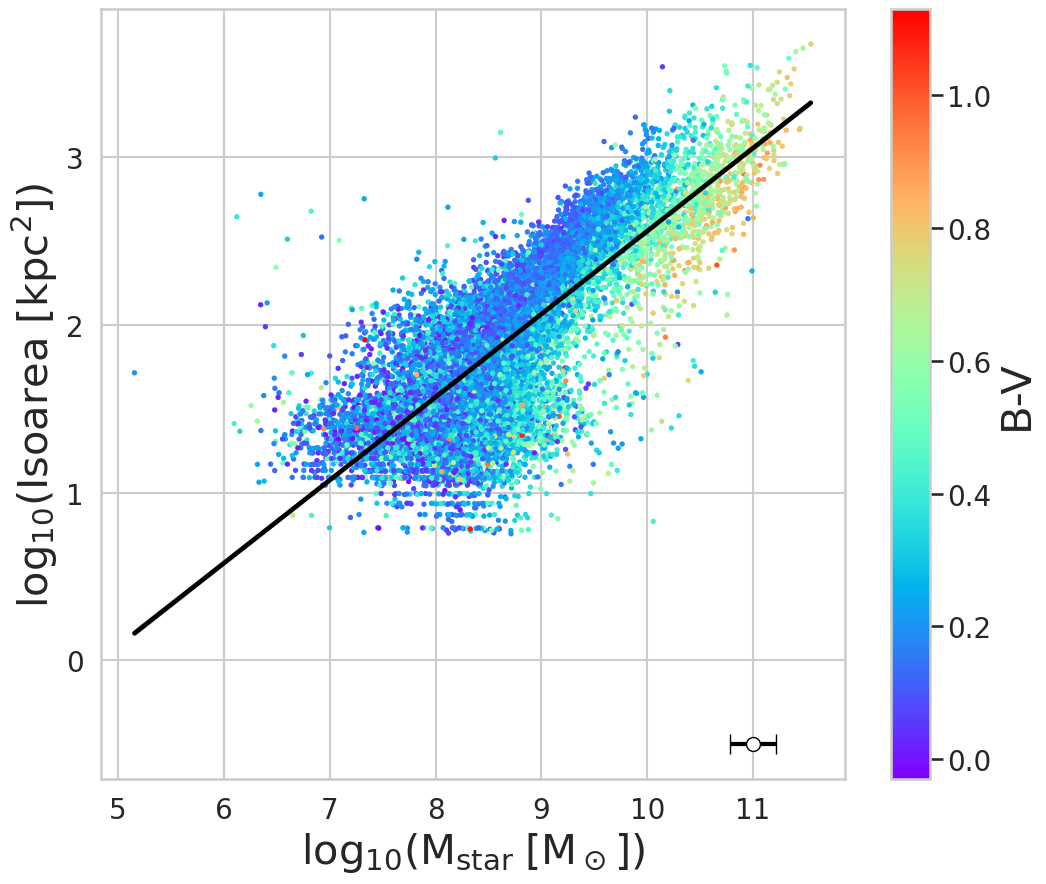

In [8]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')
sns.set_context('talk')

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

x = pd.DataFrame(df_mass["M_neb_med"])
x.columns = ['log(M)']
y = np.log10(pd.DataFrame(radio*radio * np.pi))
y.columns = ['radius']
z = pd.DataFrame(df_phys['BMag_6a_tau^NEB'] - df_phys['VMag_6a_tau^NEB'])
z.columns = ['B-V']

ax = sns.scatterplot(x = x['log(M)'], y = y['radius'], s = 15, edgecolor = 'none', data = z, hue = 'B-V', palette = 'rainbow')
sns.regplot(x = x['log(M)'], y = y['radius'], scatter=False, ax=ax, color = 'k')

plt.legend([], [], frameon=False)
norm = plt.Normalize(z['B-V'].min(), z['B-V'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])
cb = ax.figure.colorbar(sm, label = 'B-V')
cb.set_label(label='B-V', fontsize = 30)


df_test2 = pd.concat([x, y], axis = 1)
df_test2 = df_test2.dropna()
x2 = np.array(df_test2['log(M)'])#.reshape((-1, 1))
y2 = np.array(df_test2['radius'])

p, V = np.polyfit(x2, y2, 1, cov=True)

print("pendiente: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intersección: {} +/- {}".format(p[1], np.sqrt(V[1][1])))


from sklearn.linear_model import LinearRegression
x1 = pd.DataFrame(x['log(M)'])
y1 = pd.DataFrame(y['radius'])
df1 = pd.concat([x1, y1], axis = 1)
df1 = df1.apply (pd.to_numeric, errors='coerce')
df1 = df1[df1['log(M)'].notna()]
df1 = df1[df1['radius'].notna()]
x1 = np.array(df1['log(M)']).reshape(-1, 1)
y1 = np.array(df1['radius'])
model = LinearRegression().fit(x1, y1) 
r_sq = model.score(x1, y1)
print('R2 =', r_sq)
print()


serr = df_mass['s_neb_med'].mean()
eb = plt.errorbar(x = 11, y = -0.5, xerr = serr, yerr = 0, ls = 'none', linewidth = 3, ecolor = 'black', capsize=7, zorder = 1)
eb2 = plt.scatter(x = 11, y = -0.5, color = 'white', edgecolors='black', linewidths=1, s = 100)

plt.xlabel('$\mathregular{log_{10}(M_{star} \; [M_\odot])}$', size = 30)
plt.ylabel('$\mathregular{log_{10}(Isoarea}$ $\mathregular{[kpc^2])}$', size = 30)

del x, y, z
matplotlib.rcdefaults()

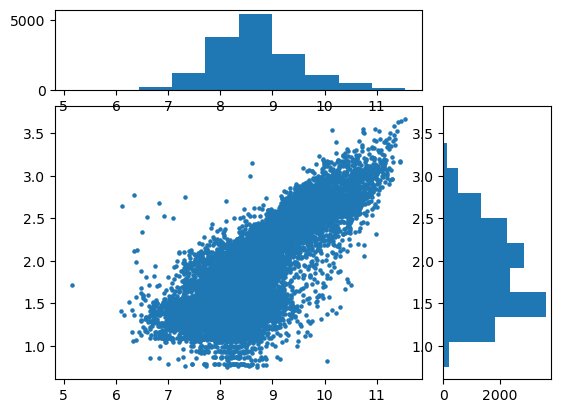

In [10]:
from matplotlib.gridspec import GridSpec

x = pd.DataFrame(df_mass["M_neb_med"])
x.columns = ['log(M)']
y = np.log10(pd.DataFrame(radio**2*np.pi))
y.columns = ['radius']
z = pd.DataFrame(df_phys['BMag_6a_tau^NEB'] - df_phys['VMag_6a_tau^NEB'])
z.columns = ['B-V']


fig = plt.figure()
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(x = x['log(M)'], y =y['radius'], s = 5)

ax_hist_x.hist(x['log(M)'])
ax_hist_y.hist(y['radius'], orientation = 'horizontal')

plt.show()

Ajuste lineal:
 - Pendiente = 0.86477
 - Origen = -1.40214
0.4929298454859271

MODELO POLINOMICO ^2:
R2 = 0.5258248660316338
a (x^2) = 0.4261009300688026
b (x)   = -0.7814389420195967
c (cte) = 0.08742999856043542


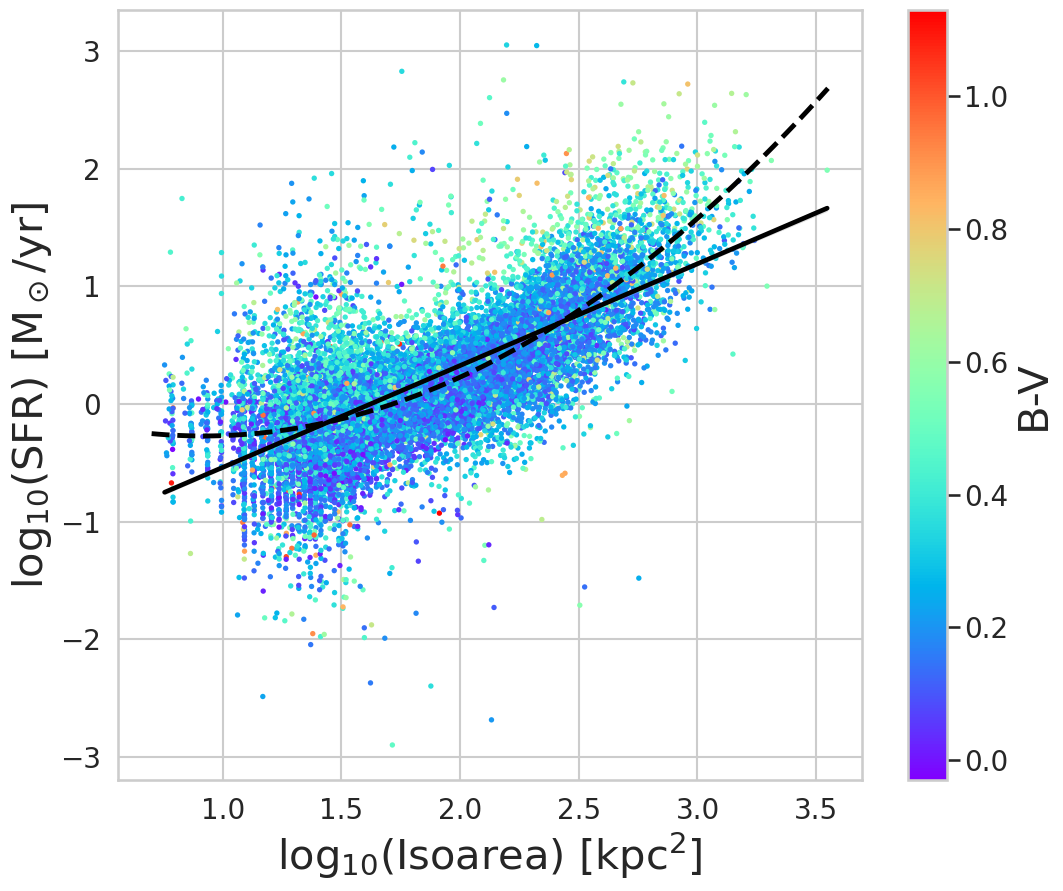

In [9]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')
sns.set_context('talk')

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

y = pd.DataFrame(df_phys["SFR_14a"])
y.columns = ['y']

x = np.log10(pd.DataFrame(radio**2*np.pi))
x.columns = ['x']

z = pd.DataFrame(df_phys['BMag_6a_tau^NEB'] - df_phys['VMag_6a_tau^NEB'])
z.columns = ['B-V']

y = np.log10(y)

ax = sns.scatterplot(x = x['x'], y = y['y'], s = 15, edgecolor = 'none', data = z, hue = 'B-V', palette = 'rainbow')
sns.regplot(x = x['x'], y = y['y'], scatter=False, ax=ax, color = 'k')

plt.legend([], [], frameon=False)
norm = plt.Normalize(z['B-V'].min(), z['B-V'].max())
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])
cb = ax.figure.colorbar(sm, label = 'B-V')
cb.set_label(label='B-V', fontsize = 30)


df_test2 = pd.concat([x, y], axis = 1)
df_test2 = df_test2.dropna()
x2 = np.array(df_test2['x'])#.reshape((-1, 1))
y2 = np.array(df_test2['y'])

m, b = np.polyfit(x2, y2, 1)

print('Ajuste lineal:')
print(' - Pendiente =', '{:.5f}'.format(m))
print(' - Origen =', '{:.5f}'.format(b))
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(x2, y2, 1))
print(r2_score(y2, mymodel(x2)))


a, b, c = np.polyfit(x2, y2, 2)

mymodel = np.poly1d(np.polyfit(x2, y2, 2))

myline = np.linspace(0.7, 3.55, 100)
plt.plot(myline, mymodel(myline), linestyle = '--', color = 'k', linewidth = 3.5)
print()
print('MODELO POLINOMICO ^2:')
from sklearn.metrics import r2_score
print('R2 =',r2_score(y2, mymodel(x2)))
print('a (x^2) =', a)
print('b (x)   =', b)
print('c (cte) =', c)

#serr = df_mass['s_neb_med'].mean()
#eb = plt.errorbar(x = 11, y = -2, xerr = serr, yerr = 0, ls = 'none', linewidth = 3, ecolor = 'black', capsize=7, zorder = 1)
#eb2 = plt.scatter(x = 11, y = -2, color = 'white', edgecolors='black', linewidths=1, s = 100)

plt.xlabel('$\mathregular{log_{10}(Isoarea)}$ $\mathregular{[kpc^2]}$', size = 30)
plt.ylabel('$\mathregular{log_{10}(SFR)}$ $\mathregular{[M_\odot/yr]}$', size = 30)

plt.show()

del x, y, z
matplotlib.rcdefaults()

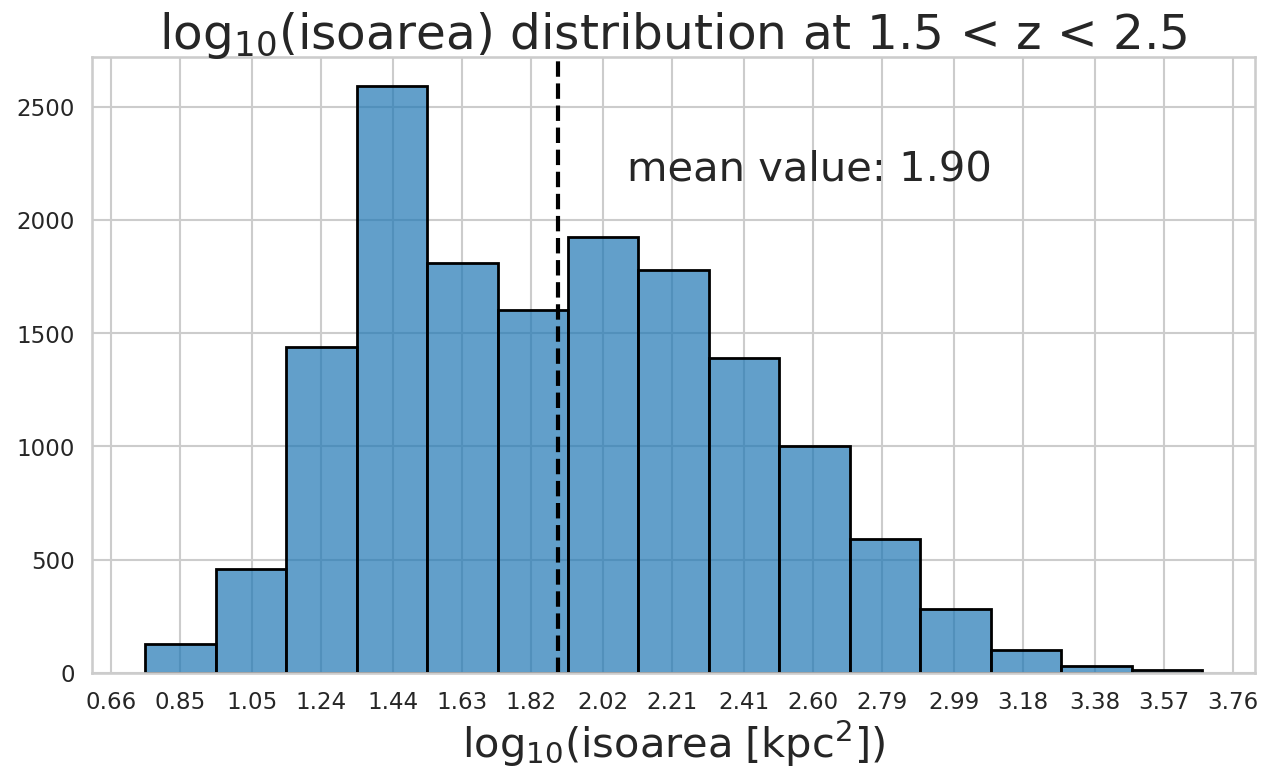

In [16]:
plt.figure(figsize = (15, 8))


#plt.grid()
#bins = 20
import matplotlib
matplotlib.rcParams['axes.axisbelow'] = False


rad = np.log10(pd.DataFrame(radio**2*np.pi))
rad.columns = ['radius']

sns.set_style("whitegrid")
sns.set_context('talk')
bins = 1 + np.log2(len(df_phys))
bins = int(bins.round())
sns.histplot(rad, bins = bins, color = "royalblue", alpha = 0.7, edgecolor = 'black', linewidth = 2)

min_ylim, max_ylim = plt.ylim()
x = rad['radius']
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(x.mean()*1.1, max_ylim*0.8, 'mean value: {:.2f}'.format(x.mean()), fontsize = 30)


plt.xlabel('$\mathregular{log_{10}(isoarea \; [kpc^2])}$', fontsize = 30)
plt.ylabel('Número de ocurrencias', fontsize = 30)
plt.ylabel(' ', fontsize = 1)

plt.xticks(np.round(np.arange(0.66, 4, step= (2.91)/15), decimals=2))
plt.title('$\mathregular{log_{10}(isoarea)}$ distribution at 1.5 < z < 2.5', fontsize = 35)
plt.legend([], [], frameon=False)
#plt.figtext(0.5, 0.01, "Para el número de bins se ha empleado: $\mathregular{bins = 1+ceil(log_2(nº}$ $\mathregular{datos))}$ ", ha="center", fontsize=30) 

plt.plot()

matplotlib.rcdefaults()